# Imports

In [1]:
# !pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Exercise 1: PCA plots
Apply PCA on a dataset of your choice and plot the following:

- scree plot (eigenvalues)

- eigenvectors (loadings)

- seaborn PairGrid, first 5 PCs

- 3d plot of first 3 PCs


# Exercise 2: Reverse Engineering
- PC: create multivariate (3 dimensions) well separated Gaussian bumps with 100 points per cluster. (300, 3) matrix
- Unembedding: pad with zeros to get a (300, 10) matrix, Z, such that the last 7 columns are all zero
- Mixing Matrix: create a (10x10) mixing matrix, R - matrix of eigenvectors: use the random_son to generate an arbitrary rotation matrix in 10 dimensions
- Apply the mixing matrix to the unembedded datapoints to get the (300, 10) design matrix: X = R @ Z
- apply PCA and reduce dimensionality to 3
- apply KMeans clustering to label the gaussian bumps

In [3]:
def random_son(n):
    """
    Generate a random element of the special orthogonal group SO(n).

    Parameters:
    n (int): The dimension of the SO(n) group.

    Returns:
    numpy.ndarray: An n x n orthogonal matrix with determinant +1.
    """
    # Generate a random n x n matrix with entries drawn from a normal distribution
    random_matrix = np.random.randn(n, n)
    
    # Perform QR decomposition
    q, r = np.linalg.qr(random_matrix)
    
    # Ensure the determinant of Q is +1 (correct for the sign of R's diagonal entries)
    d = np.diag(r)
    ph = np.sign(d)
    q *= ph
    
    # Ensure det(Q) = 1 (special orthogonal matrix)
    if np.linalg.det(q) < 0:
        q[:, 0] *= -1

    return q

Random SO(3) element:
Orthogonality check (should be close to identity):
Determinant (should be 1):
1.0000000000000004


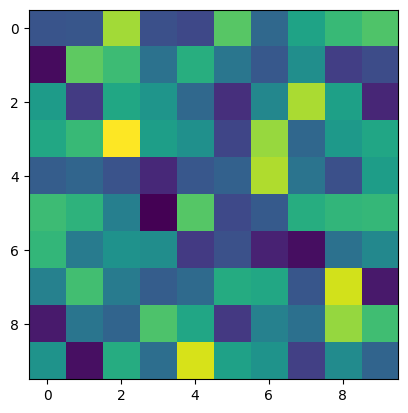

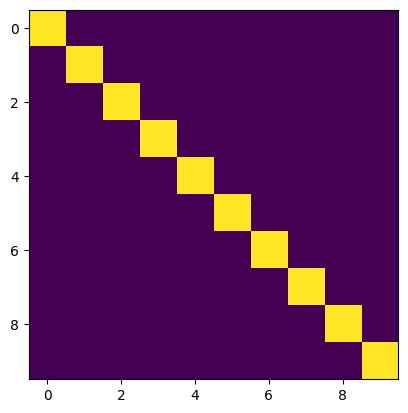

In [4]:
n = 10  # Dimension of the SO(n) group
random_element = random_son(10)
print("Random SO(3) element:")
plt.figure()
plt.imshow(random_element)

# Verify orthogonality
print("Orthogonality check (should be close to identity):")
plt.figure()
plt.imshow(np.dot(random_element.T, random_element))

# Verify determinant
print("Determinant (should be 1):")
print(np.linalg.det(random_element))

In [20]:
# - PC: create multivariate (3 dimensions) well separated Gaussian bumps with 100 points per cluster. (300, 3) matrix

# Generate 3 clusters of 100 points each
np.random.seed(0)
cluster1 = np.random.randn(100, 3) + np.array([0, 10, 0])
cluster2 = np.random.randn(100, 3) + np.array([10, 0, 0])
cluster3 = np.random.randn(100, 3) + np.array([0, 0, 10])

# Combine the clusters into a single matrix
X = np.concatenate([cluster1, cluster2, cluster3])

X.shape # 300 points in 3 dimensions

# Append dimensions: pad with zeros to get a (300, 10) matrix, Z, such that the last 7 columns are all zero
Z = np.concatenate([X, np.zeros((300, 7))], axis=1)

Z.shape # 300 points in 10 dimensions

# get mixing matrix A (10, 10) and mix Z to get S
A = random_son(10)
S = np.dot(Z, A)

S.shape # 300 points in 10 dimensions

# shuffle 300 points
# np.random.seed(0)
# np.random.shuffle(S)

(300, 10)

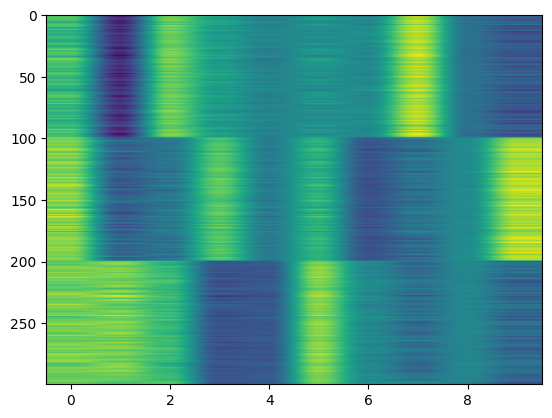

In [21]:
plt.imshow(S, aspect='auto')

In [22]:
# - PC: apply PCA to S to get S_pca
pca = PCA(n_components=10)
S_pca = pca.fit_transform(S)

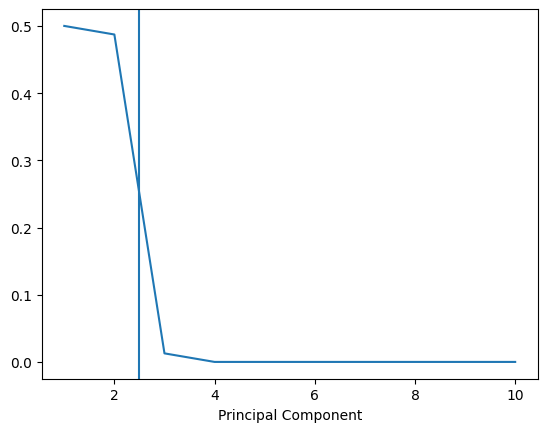

In [23]:
# scree plot
plt.plot(np.arange(1, 11), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.axvline(2.5)

Text(0, 0.5, 'Original Dimension')

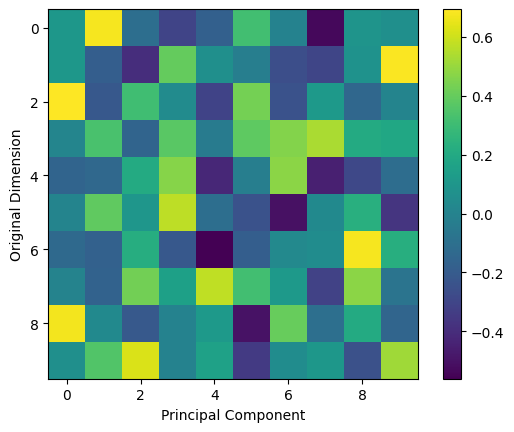

In [24]:
# Eigenvectors
plt.figure()
plt.imshow(pca.components_)
plt.colorbar()
plt.xlabel('Principal Component')
plt.ylabel('Original Dimension')

array([[<Axes: xlabel='PC1', ylabel='PC1'>,
        <Axes: xlabel='PC2', ylabel='PC1'>,
        <Axes: xlabel='PC3', ylabel='PC1'>,
        <Axes: xlabel='PC4', ylabel='PC1'>,
        <Axes: xlabel='PC5', ylabel='PC1'>,
        <Axes: xlabel='PC6', ylabel='PC1'>,
        <Axes: xlabel='PC7', ylabel='PC1'>,
        <Axes: xlabel='PC8', ylabel='PC1'>,
        <Axes: xlabel='PC9', ylabel='PC1'>,
        <Axes: xlabel='PC10', ylabel='PC1'>],
       [<Axes: xlabel='PC1', ylabel='PC2'>,
        <Axes: xlabel='PC2', ylabel='PC2'>,
        <Axes: xlabel='PC3', ylabel='PC2'>,
        <Axes: xlabel='PC4', ylabel='PC2'>,
        <Axes: xlabel='PC5', ylabel='PC2'>,
        <Axes: xlabel='PC6', ylabel='PC2'>,
        <Axes: xlabel='PC7', ylabel='PC2'>,
        <Axes: xlabel='PC8', ylabel='PC2'>,
        <Axes: xlabel='PC9', ylabel='PC2'>,
        <Axes: xlabel='PC10', ylabel='PC2'>],
       [<Axes: xlabel='PC1', ylabel='PC3'>,
        <Axes: xlabel='PC2', ylabel='PC3'>,
        <Axes: xlabel='PC3',

<Figure size 640x480 with 0 Axes>

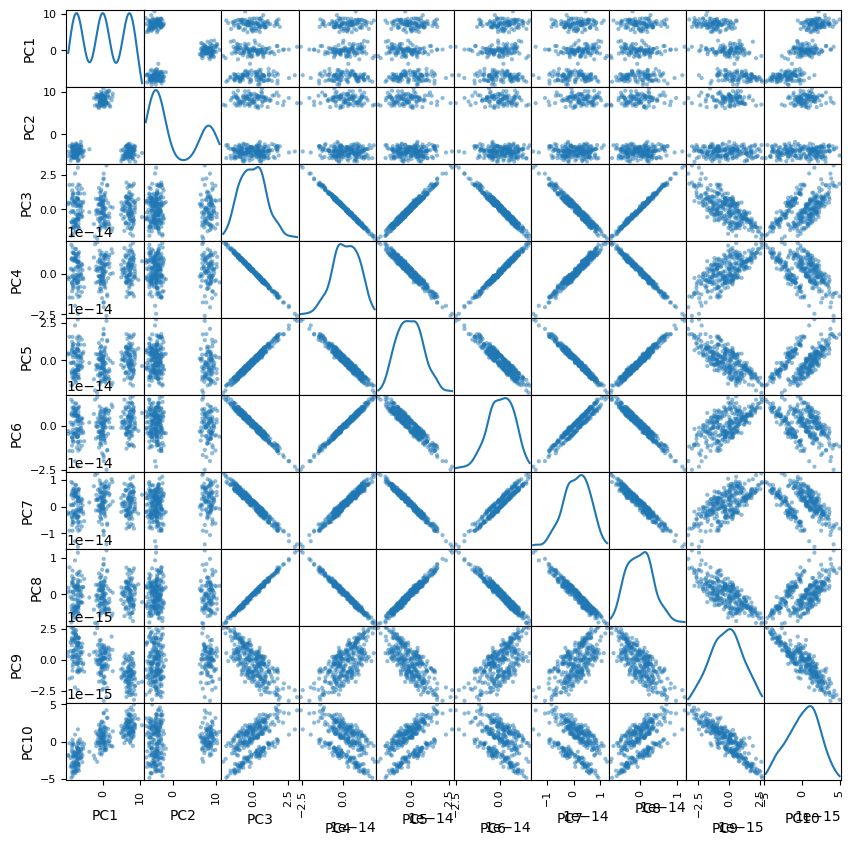

In [25]:
# pairgrid
df = pd.DataFrame(S_pca, columns=[f'PC{i}' for i in range(1, 11)])
plt.figure()
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(10, 10), diagonal='kde')



Text(0.5, 1.0, 'KMeans Clustering of S_pca')

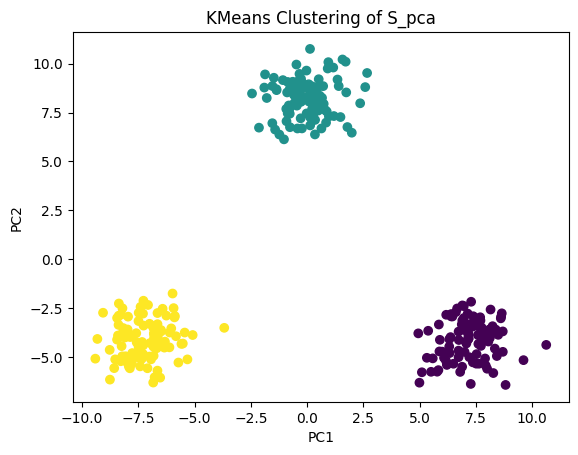

In [27]:
# Kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

# take first 3 principal components
S_pca_reduced = S_pca[:, :3]

kmeans.fit(S_pca_reduced)

# plot clusters
plt.figure()
plt.scatter(S_pca_reduced[:, 0], S_pca_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering of S_pca')